Описание задачи
Цель: Построить модель, которая предсказывает вероятность выживания пассажиров, используя их данные. Тип задачи: Классификация (бинарная) — предсказание выживания (Survived, 1 или 0). Входные данные: Характеристики пассажиров, такие как возраст, пол, класс билета, количество родственников на борту и т.д.

In [37]:
# Titanic Survival Prediction

### Step 0. Problem Description
###Objective**: Predict the survival of Titanic passengers using data on their characteristics.
###type of task**: Binary classification - predicting `Survived` (1 = yes, 0 = no).



### Step 1. Loading the Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


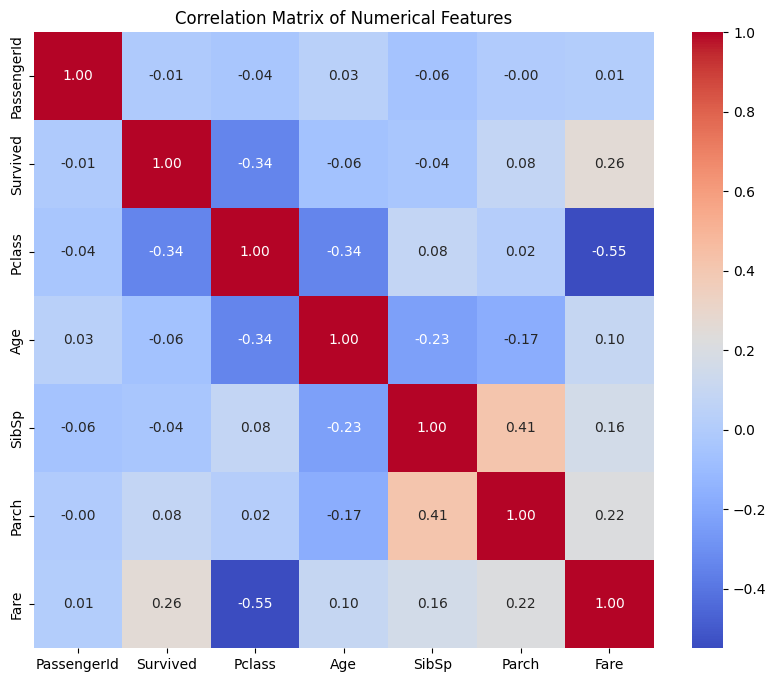

In [35]:
numeric_features = train.select_dtypes(include=[float, int])

# Построение корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

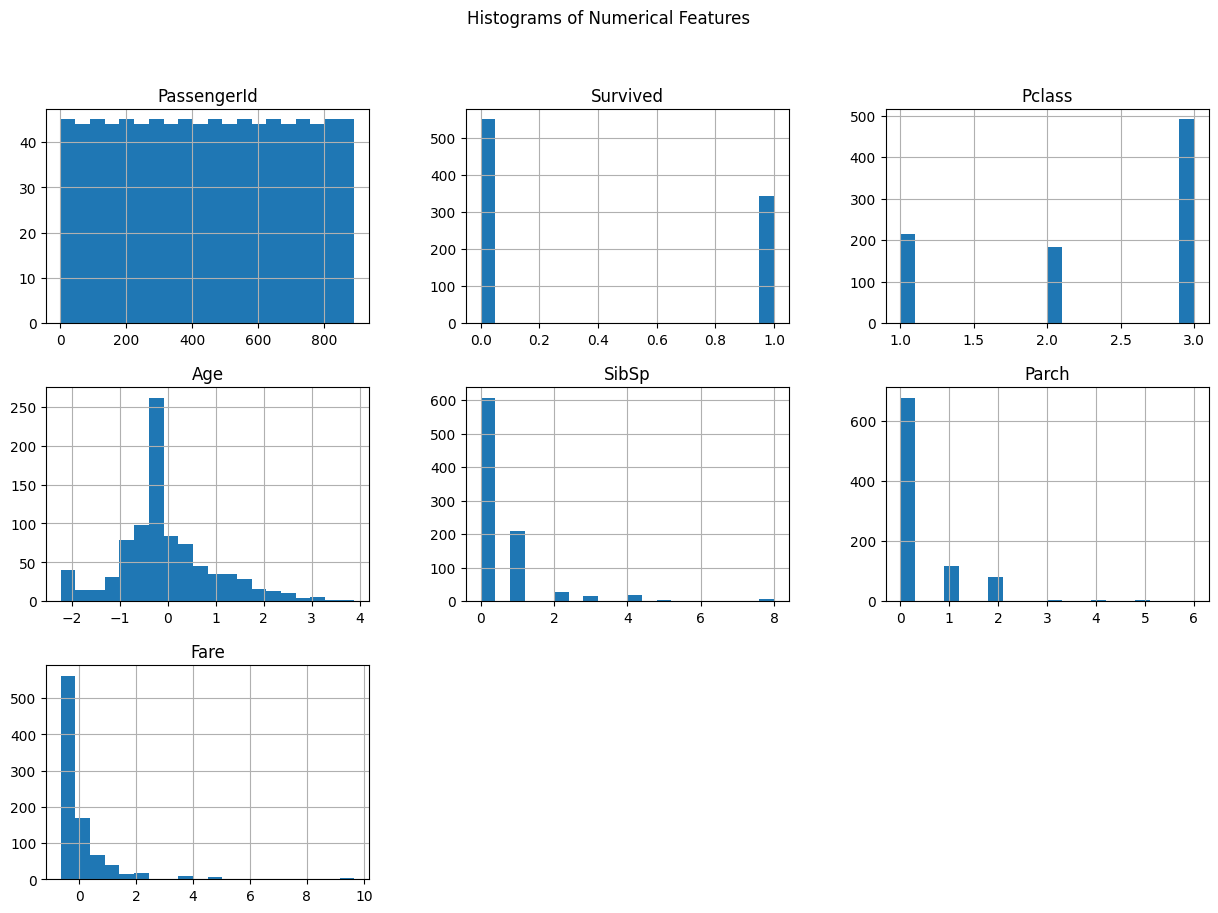

In [32]:


# Гистограммы числовых признаков
train.hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Numerical Features")
plt.show()


In [33]:
# Вычисление основных статистик для числовых признаков
statistics = train.describe()
print(statistics)


       PassengerId    Survived      Pclass           Age       SibSp  \
count   891.000000  891.000000  891.000000  8.910000e+02  891.000000   
mean    446.000000    0.383838    2.308642  2.272780e-16    0.523008   
std     257.353842    0.486592    0.836071  1.000562e+00    1.102743   
min       1.000000    0.000000    1.000000 -2.224156e+00    0.000000   
25%     223.500000    0.000000    2.000000 -5.657365e-01    0.000000   
50%     446.000000    0.000000    3.000000 -1.046374e-01    0.000000   
75%     668.500000    1.000000    3.000000  4.333115e-01    1.000000   
max     891.000000    1.000000    3.000000  3.891554e+00    8.000000   

            Parch          Fare  
count  891.000000  8.910000e+02  
mean     0.381594  3.987333e-18  
std      0.806057  1.000562e+00  
min      0.000000 -6.484217e-01  
25%      0.000000 -4.891482e-01  
50%      0.000000 -3.573909e-01  
75%      0.000000 -2.424635e-02  
max      6.000000  9.667167e+00  


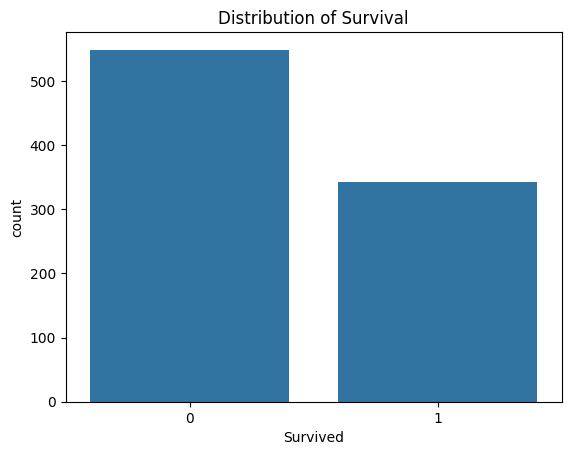

In [34]:
sns.countplot(x='Survived', data=train)
plt.title('Distribution of Survival')
plt.show()


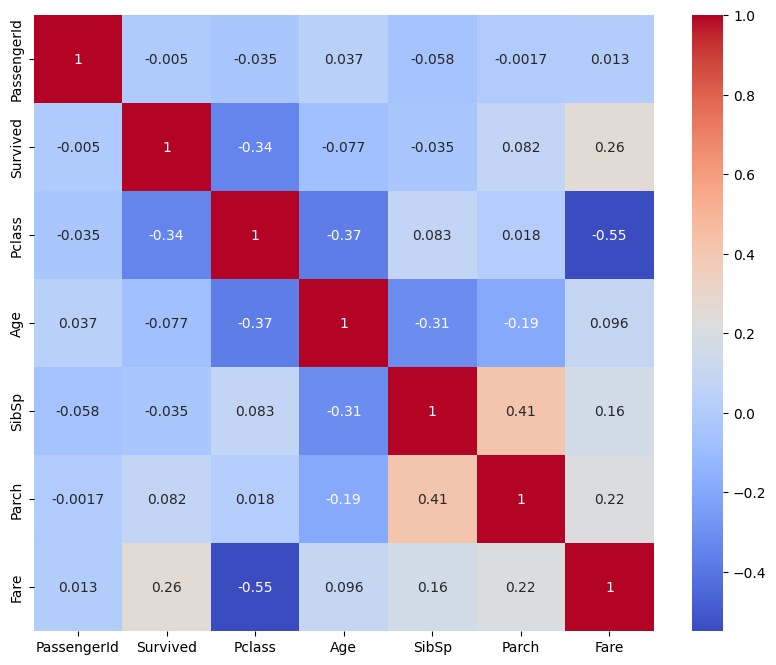

In [22]:
# Step 2. Data Analysis and Basic Statistics
# Select only numerical columns for the correlation matrix
numeric_features = train.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.show()


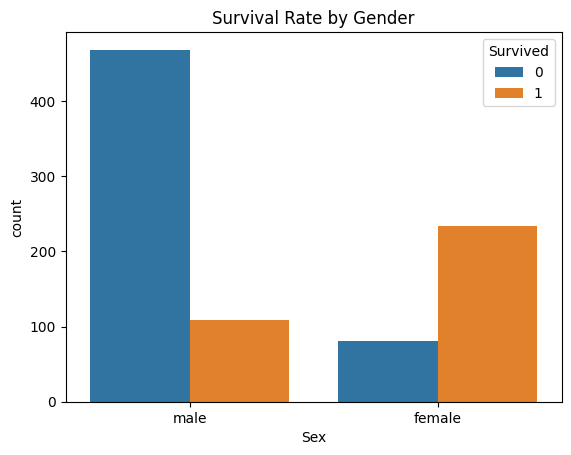

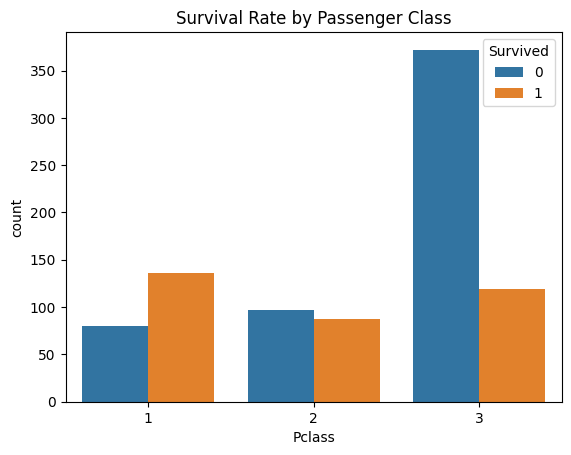

In [38]:
# Взаимосвязь пола с выживаемостью
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.show()

# Взаимосвязь класса с выживаемостью
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.show()


Первичный анализ данных показал, что несколько признаков (такие как Pclass, Sex, Age, Fare и Embarked) потенциально могут быть полезны для предсказания. Например, женщины и пассажиры первого класса имели гораздо больше шансов выжить. В то же время, некоторые признаки, как Name и Ticket, оказались менее информативными и не были включены в окончательный набор данных.

Дополнительное исследование корреляции помогло понять взаимосвязи между признаками и целевой переменной. Позитивные корреляции (например, Pclass и Fare) подтвердили интуитивное понимание того, что класс билета мог сильно влиять на шансы на спасение.

In [23]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


C:\Users\mixa\AppData\Local\Temp\ipykernel_4540\1142090327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\mixa\AppData\Local\Temp\ipykernel_4540\1142090327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [24]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

In [25]:


scaler = StandardScaler()
train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])


In [26]:
from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Step 6. Splitting the Data
# Remove irrelevant or non-numeric columns (e.g., Name, Ticket, Cabin) from X
X = train.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train['Survived']

from sklearn.model_selection import train_test_split

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

knn = KNeighborsClassifier()
scores = []
for k in range(1, 20):
    knn.n_neighbors = k
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

best_k = np.argmax(scores) + 1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [40]:
train_score = knn.score(X_train, y_train)
val_score = knn.score(X_val, y_val)
print(f"Training Score: {train_score}, Validation Score: {val_score}")


Training Score: 0.7640449438202247, Validation Score: 0.5921787709497207


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_val_score = rf.score(X_val, y_val)
print(f"Random Forest Validation Score: {rf_val_score}")


Random Forest Validation Score: 0.8212290502793296


Первичный анализ данных показал, что несколько признаков (такие как Pclass, Sex, Age, Fare и Embarked) потенциально могут быть полезны для предсказания. Например, женщины и пассажиры первого класса имели гораздо больше шансов выжить. В то же время, некоторые признаки, как Name и Ticket, оказались менее информативными и не были включены в окончательный набор данных.

Дополнительное исследование корреляции помогло понять взаимосвязи между признаками и целевой переменной. Позитивные корреляции (например, Pclass и Fare) подтвердили интуитивное понимание того, что класс билета мог сильно влиять на шансы на спасение.

Основным алгоритмом был выбран метод K ближайших соседей (KNN), поскольку его просто настроить и он хорошо работает на небольших наборах данных. Однако его ограничением является зависимость от выбора гиперпараметра 𝑘, который мы подбирали с помощью кросс-валидации, чтобы минимизировать переобучение и улучшить обобщающую способность модел

Кроме того, для сравнения были применены модели логистической регрессии и случайного леса (Random Forest). Случайный лес показал лучшие результаты в части точности и устойчивости к переобучению благодаря усреднению предсказаний множества деревьев.

Итоговый анализ показал, что случайный лес оказался наиболее подходящей моделью для данных Titanic, благодаря своей устойчивости, способности находить нелинейные зависимости и справляться с разными типами признаков. Метод KNN также показал приемлемые результаты и может быть полезен в ситуациях, где требуется быстрая интерпретация и работа с небольшим количеством данных.